In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
!cp -R '/content/drive/MyDrive/disease_detection/Data' '/content/'

In [3]:
%cd /content/drive/MyDrive/disease_detection



/content/drive/MyDrive/disease_detection


In [ ]:
from google.colab import auth
auth.authenticate_user()
project_id = 'diseasedetection-407212'
!gcloud config set project {project_id}
!gsutil ls

In [ ]:
!cp -R '/content/drive/MyDrive/disease_detection/Data' '/content/'

In [ ]:
# @title create no disease masks
import cv2 as cv2
from PIL import Image
import numpy as np
import os
# Input and output folders for testing, scap
input_folder = "/content/drive/MyDrive/disease_detection/Data/data_masked/test/good"
output_folder = "/content/drive/MyDrive/disease_detection/Data/data_masked/ground_truth_disease/good"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
input_files = os.listdir(input_folder)

for img in input_files:
    mask = np.zeros((256, 256), dtype=np.uint8)
    local_filename = f'{img}.png'
    input_path = os.path.join(output_folder, local_filename)
    cv2.imwrite(input_path, mask)



In [ ]:
# !git clone https://github.com/tientrandinh/Revisiting-Reverse-Distillation.git

In [4]:
%cd ./Revisiting-Reverse-Distillation
!pip install geomloss
!pip install imutils
!pip install opencv-python --upgrade
!pip install opensimplex


/content/drive/MyDrive/disease_detection/Revisiting-Reverse-Distillation
  Preparing metadata (setup.py) ... done
  Created wheel for geomloss: filename=geomloss-0.2.6-py3-none-any.whl size=32245 sha256=459c78d01ba6f56dcb48655ec0686d4fcf8f5174af1077c7e3f5e6701b21661a
  Stored in directory: /root/.cache/pip/wheels/0d/c9/80/4387eb03aa215ae557869d6fe8be498fd3d3cf297db2357b67
Successfully built geomloss
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 25.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.8.0.76
    Uninstalling opencv-python-4.8.0.76:
      Successfully uninstalled opencv-python-4.8.0.76
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.0/268.0 kB 5.8 MB/s eta 0:00:00


In [ ]:
!python main-Copy1.py  --classes data_masked \
                       --save_folder lab/ \
                       --checkpoint_folder lab/  \
                       --use_pretrained True \
                       --color_space LAB \
                       --noise opensimplex

data_masked
good
scap
33
33
Loaded pretrained model.
Downloading: "https://download.pytorch.org/models/wide_resnet50_2-95faca4d.pth" to /root/.cache/torch/hub/checkpoints/wide_resnet50_2-95faca4d.pth
100% 132M/132M [00:00<00:00, 252MB/s]
with class data_masked, Training with 350 Epoch
  0% 0/350 [00:00<?, ?it/s]###############################    Anomaly detection 0   #####################
Anomaly score of 0: 0.012605153777755321
###############################    Anomaly detection 1   #####################
Anomaly score of 1: 0.012427010093244163
###############################    Anomaly detection 2   #####################
Anomaly score of 2: 0.012425934733122751
###############################    Anomaly detection 3   #####################
Anomaly score of 3: 0.014589817785274996
###############################    Anomaly detection 4   #####################
Anomaly score of 4: 0.012492289966306544
###############################    Anomaly detection 5   #####################
Anomaly 

In [5]:
%matplotlib inline
!python inference-Copy1.py --checkpoint_folder RGB_fist_training \
                           --classes data_masked  \
                           --color_space RGB


scap
33
33
good
9
32
Loaded pretrained model.
Downloading: "https://download.pytorch.org/models/wide_resnet50_2-95faca4d.pth" to /root/.cache/torch/hub/checkpoints/wide_resnet50_2-95faca4d.pth
100% 132M/132M [00:00<00:00, 439MB/s]
###############################    Anomaly detection 0   #####################
Anomaly score of 0: 4.2621783983583414
###############################    Anomaly detection 1   #####################
Anomaly score of 1: 4.818206406006949
###############################    Anomaly detection 2   #####################
Anomaly score of 2: 6.290797972600818
###############################    Anomaly detection 3   #####################
Anomaly score of 3: 4.226887059965011
###############################    Anomaly detection 4   #####################
Anomaly score of 4: 6.2682370517226635
###############################    Anomaly detection 5   #####################
Anomaly score of 5: 9.721158734500143
###############################    Anomaly detection 6   ########

In [ ]:
%matplotlib inline
!python inference-Copy1.py --checkpoint_folder RD++_big/ \
                           --classes data_masked  \
                           --color_space RGB

scap
33
33
good
9
32
Loaded pretrained model.
###############################    Anomaly detection 0   #####################
Anomaly score of 0: 1.8730617371027887
###############################    Anomaly detection 1   #####################
Anomaly score of 1: 1.8144143342284005
###############################    Anomaly detection 2   #####################
Anomaly score of 2: 2.225001460896123
###############################    Anomaly detection 3   #####################
Anomaly score of 3: 1.9584162143686445
###############################    Anomaly detection 4   #####################
Anomaly score of 4: 2.878267838975961
###############################    Anomaly detection 5   #####################
Anomaly score of 5: 2.3533772967899402
###############################    Anomaly detection 6   #####################
Anomaly score of 6: 1.9686300531556593
###############################    Anomaly detection 7   #####################
Anomaly score of 7: 2.307063750959445
#############

In [ ]:
!python untitled.py  --classes data_masked \
                       --save_folder RD++_RGB_Opensimplex/ \
                       --checkpoint_folder  RD++_RGB_Opensimplex/  \
                       --use_pretrained True \
                       --color_space RGB \
                       --noise opensimplex

data_masked
scap
33
33
good
9
32
Traceback (most recent call last):
  File "/content/drive/MyDrive/disease_detection/Revisiting-Reverse-Distillation/untitled.py", line 218, in <module>
    auroc_sp, auroc_px, aupro_px, total_loss, loss_proj, loss_distill, auroc_px_list, auroc_sp_list, aupro_px_list = train(c, pars)
  File "/content/drive/MyDrive/disease_detection/Revisiting-Reverse-Distillation/untitled.py", line 76, in train
    train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=pars.batch_size, shuffle=True)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 349, in __init__
    sampler = RandomSampler(dataset, generator=generator)  # type: ignore[arg-type]
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/sampler.py", line 140, in __init__
    raise ValueError(f"num_samples should be a positive integer value, but got num_samples={self.num_samples}")
ValueError: num_samples should be a positive integer value, but go

In [ ]:
!python interference_for_classification.py --checkpoint_folder General_model/ \
                           --classes data_masked  \
                           --color_space RGB


scap
good
Loaded pretrained model.
###############################    Anomaly detection 0   #####################
Anomaly score of 0: 0.1068801087235091
###############################    Anomaly detection 1   #####################
Anomaly score of 1: 0.7120848748660198
###############################    Anomaly detection 2   #####################
Anomaly score of 2: 0.22016442028688793
###############################    Anomaly detection 3   #####################
Anomaly score of 3: 0.14321960913525658
###############################    Anomaly detection 4   #####################
Anomaly score of 4: 0.14967734558028928
###############################    Anomaly detection 5   #####################
Anomaly score of 5: 0.11279547032343162
###############################    Anomaly detection 6   #####################
Anomaly score of 6: 0.11043509537170507
###############################    Anomaly detection 7   #####################
Anomaly score of 7: 0.10103848214277214
###############

In [ ]:
/content/drive/MyDrive/disease_detection/Revisiting_Reverse_Distillation/utils/utils_test.py
!ls

dataset  inference-Copy1.py  main-Copy1.py  model  RD++_checkpoint_result1  utils


In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
torch.cuda.memory_summary(device=None, abbreviated=False)


'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |      0 B   |      0 B   |      0 B   |      0 B   |\n|       from large pool |      0 B   |      0 B   |      0 B   |      0 B   |\n|       from small pool |      0 B   |      0 B   |      0 B   |      0 B   |\n|---------------------------------------------------------------------------|\n| Active memory         |      0 B   |      0 B   |      0 B   |      0 B   |\n|       from large pool |      0 B   |      0 B   |

In [ ]:
torch.cuda.memory_allocated()

0

In [ ]:
torch.cuda.memory_reserved()

0

In [ ]:
from google.colab import drive
drive.flush_and_unmount()

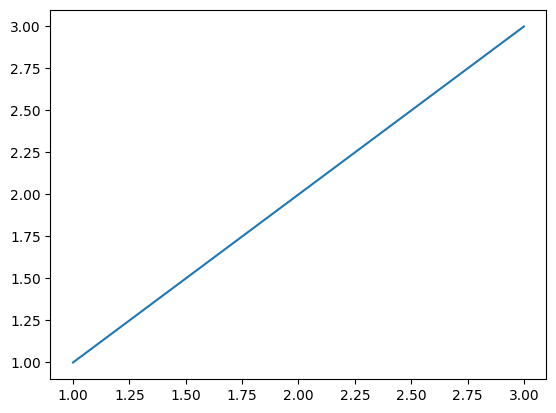

In [ ]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3], [1, 2, 3])
plt.show()